In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Cal_house.csv")
df.head()

,longitude,latitude,housingage,totalrooms,totalbedrooms,population,households,medianincome,housevalue
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [3]:
df.isnull().sum()

longitude          0
latitude           0
housingage         0
totalrooms         0
totalbedrooms    207
population         0
households         0
medianincome       0
housevalue         0
dtype: int64

In [4]:
bedroom_mean=df['totalbedrooms'].mean()
bedroom_mean

537.8705525375618

In [5]:
df['totalbedrooms']=df['totalbedrooms'].fillna(value=bedroom_mean)

In [6]:
df.isnull().sum()

longitude        0
latitude         0
housingage       0
totalrooms       0
totalbedrooms    0
population       0
households       0
medianincome     0
housevalue       0
dtype: int64

In [7]:
df.dtypes

longitude        float64
latitude         float64
housingage         int64
totalrooms         int64
totalbedrooms    float64
population         int64
households         int64
medianincome     float64
housevalue         int64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

In [9]:
df.corr()

,longitude,latitude,housingage,totalrooms,totalbedrooms,population,households,medianincome,housevalue
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housingage,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
totalrooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
totalbedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
medianincome,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
housevalue,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [10]:
df.shape

(20640, 9)

In [11]:
df.describe()

,longitude,latitude,housingage,totalrooms,totalbedrooms,population,households,medianincome,housevalue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df.skew()

longitude       -0.297801
latitude         0.465953
housingage       0.060331
totalrooms       4.147343
totalbedrooms    3.477023
population       4.935858
households       3.410438
medianincome     1.646657
housevalue       0.977763
dtype: float64

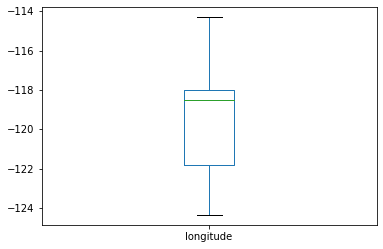

In [13]:
df['longitude'].plot.box()

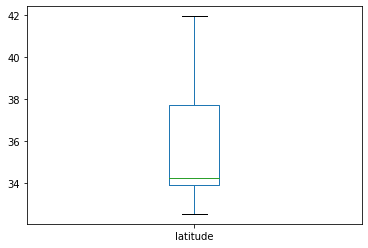

In [14]:
df['latitude'].plot.box()

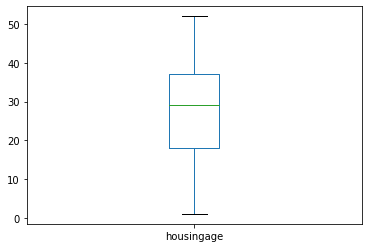

In [15]:
df["housingage"].plot.box()

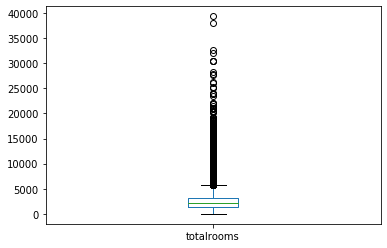

In [16]:
df['totalrooms'].plot.box()

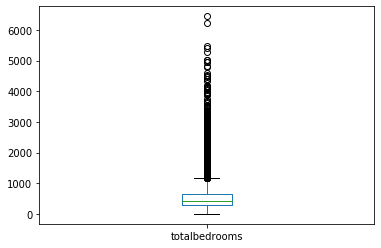

In [17]:
df['totalbedrooms'].plot.box()

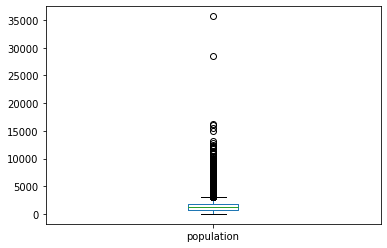

In [18]:
df['population'].plot.box()

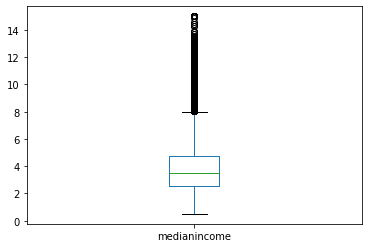

In [19]:
df['medianincome'].plot.box()

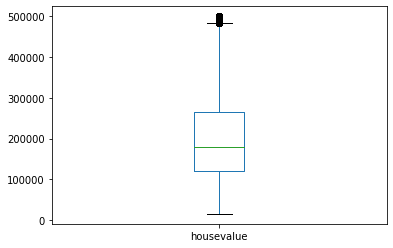

In [20]:
df['housevalue'].plot.box()

In [21]:
#Removing outliers
from scipy.stats import zscore
z=abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,longitude,latitude,housingage,totalrooms,totalbedrooms,population,households,medianincome,housevalue
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [22]:
print(df.shape)
print(df_new.shape)

(20640, 9)
(19746, 9)


In [23]:
from sklearn.preprocessing import normalize

In [24]:
df_new=normalize(df_new)
df_new

array([[-2.70061253e-04,  8.36940215e-05,  9.05875101e-05, ...,
         2.78390885e-04,  1.83941253e-05,  9.99997733e-01],
       [-3.40842680e-04,  1.05582588e-04,  5.85640344e-05, ...,
         3.17361291e-03,  2.31506417e-05,  9.99771730e-01],
       [-3.47170619e-04,  1.07496793e-04,  1.47683837e-04, ...,
         5.02693060e-04,  2.06115515e-05,  9.99989979e-01],
       ...,
       [-1.31282278e-03,  4.27030210e-04,  1.84111427e-04, ...,
         4.68942635e-03,  1.84111427e-05,  9.99616748e-01],
       [-1.43191897e-03,  4.65385468e-04,  2.12450886e-04, ...,
         4.11918661e-03,  2.20382385e-05,  9.99699445e-01],
       [-1.35527430e-03,  4.40095258e-04,  1.78855071e-04, ...,
         5.92457421e-03,  2.67008263e-05,  9.99352706e-01]])

In [25]:
df_new=pd.DataFrame(df_new)
df_new.head()

,0,1,2,3,4,5,6,7,8
0,-0.000270,0.000084,0.000091,0.001944,0.000285,0.000711,0.000278,0.000018,0.999998
1,-0.000341,0.000106,0.000059,0.019797,0.003084,0.006696,0.003174,0.000023,0.999772
2,-0.000347,0.000107,0.000148,0.004166,0.000540,0.001409,0.000503,0.000021,0.999990
3,-0.000358,0.000111,0.000152,0.003733,0.000689,0.001635,0.000642,0.000017,0.999991
4,-0.000357,0.000111,0.000152,0.004754,0.000818,0.001651,0.000757,0.000011,0.999987


In [26]:
df_new.skew()

0   -2.185015
1    2.223602
2    2.795866
3    2.099357
4    2.182114
5    2.125714
6    1.998641
7    2.486077
8   -9.288983
dtype: float64

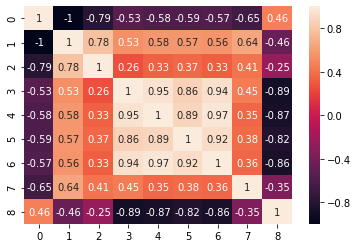

In [27]:
sns.heatmap(df_new.corr(),annot=True)

In [28]:
x=df_new.drop(8,axis=1)
x.head()

,0,1,2,3,4,5,6,7
0,-0.000270,0.000084,0.000091,0.001944,0.000285,0.000711,0.000278,0.000018
1,-0.000341,0.000106,0.000059,0.019797,0.003084,0.006696,0.003174,0.000023
2,-0.000347,0.000107,0.000148,0.004166,0.000540,0.001409,0.000503,0.000021
3,-0.000358,0.000111,0.000152,0.003733,0.000689,0.001635,0.000642,0.000017
4,-0.000357,0.000111,0.000152,0.004754,0.000818,0.001651,0.000757,0.000011


In [29]:
y=df_new[8]
y.head()

0    0.999998
1    0.999772
2    0.999990
3    0.999991
4    0.999987
Name: 8, dtype: float64

In [30]:
print(x.shape)
print(y.shape)

(19746, 8)
(19746,)


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=21)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15599, 8)
(4147, 8)
(15599,)
(4147,)


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lm=linear_model.LinearRegression()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 score corresponding to',final_r_state,"is",max_r_score)    

max r2 score corresponding to 36 is 0.8652758219190347


In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.69101529707564

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=36)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [36]:
print("r2 score is:", r2_score(y_test,y_pred))
print("RMSE is:", np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.8652758219190347
RMSE is: 0.00017712295097543746


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [38]:
dt=RandomForestRegressor()
dt.fit(x_train,y_train)
print('mean squared errror is',)
np.sqrt(mean_squared_error(y_test,dt.predict(x_test)))

mean squared errror is


0.0001945520149677966

In [39]:
cv=cross_val_score(dt,x_train,y_train,scoring='r2',cv=10)
cv.std()
cv.mean()

0.7928411941626117

In [40]:
params=[{
            
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(dt,params,cv=10,scoring='r2',n_jobs=-1)
gc.fit(x_train,y_train)
gc.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [41]:
gc.best_score_

0.821092875347581

Using LOOCV

In [42]:
from sklearn import model_selection

In [52]:
loocv = model_selection.LeaveOneOut()
import warnings
warnings.filterwarnings('ignore')
print(cross_val_score(dt,x,y,cv =loocv))
accuracy_llr=(cross_val_score(dt,x,y,cv =loocv)).mean()*100
accuracy_llr

[0.75942769 0.0697947  0.79534603 0.74120134 0.79540289]


65.57910115476979

In [44]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(lm,"project_21.pkl")

['project_21.pkl']